In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import h5py

In [4]:
from tqdm import tqdm_notebook

In [12]:
with h5py.File('data/parent_genotype_2bit/all_matrix', 'r') as f:
    X_male = f['X_male'][:]
    X_female = f['X_female'][:]
X = np.concatenate([X_male, X_female], axis=0)
del X_male
del X_female

In [44]:
X[:10, :]

array([[1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ..., 
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1]], dtype=int8)

In [57]:
# swap alleles such that odd features are major alleles and even features are minor allens
allele_freq = X.sum(axis=0)
ind = np.nonzero(np.repeat((allele_freq[0::2] - allele_freq[1::2] < 0), 2))[0]
rev_ind = ind.reshape((-1, 2))[:, ::-1].reshape((-1))
X_rev = np.take(X, ind, axis=1)
X[:, rev_ind] = X_rev
allele_freq = X.sum(axis=0)

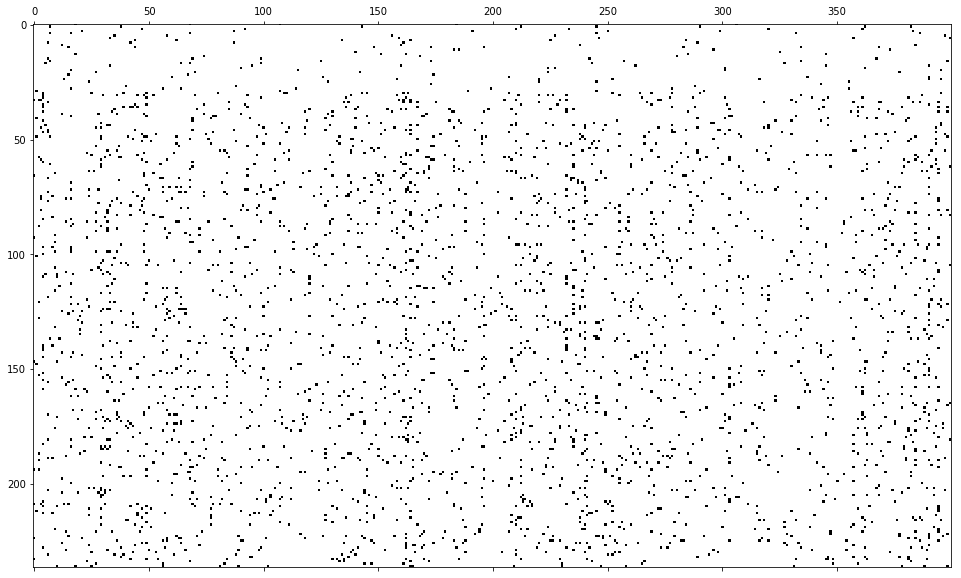

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.matshow(X[:, 1:800:2], cmap=cm.Greys)

In [68]:
np.unique(allele_freq[0::2], return_counts=True)

(array([170, 174, 182, 183, 184, 190, 201, 202, 203, 204, 206, 207, 209,
        210, 212, 213, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237]),
 array([      1,       2,       2,       1,       2,       2,       1,
              2,       2,       3,       2,       1,       1,       1,
              1,       1,       4,       1,       3,       2,       3,
              1,       4,       8,      13,      14,       7,      12,
             10,       9,      14,      19,      25,      13,      19,
             23, 1892890]))

In [72]:
genotype_freq_00 = np.sum(np.logical_and(X[:, 0::2] == 0, X[:, 1::2] == 0), axis=1)
genotype_freq_10 = np.sum(np.logical_and(X[:, 0::2] == 1, X[:, 1::2] == 0), axis=1)
genotype_freq_01 = np.sum(np.logical_and(X[:, 0::2] == 0, X[:, 1::2] == 1), axis=1)
genotype_freq_11 = np.sum(np.logical_and(X[:, 0::2] == 1, X[:, 1::2] == 1), axis=1)
print('genotype freq (00): %.1f'%genotype_freq_00.mean())
print('genotype freq (10): %.1f'%genotype_freq_10.mean())
print('genotype freq (01): %.1f'%genotype_freq_01.mean())
print('genotype freq (11): %.1f'%genotype_freq_11.mean())

genotype freq (10): 0.0
genotype freq (10): 1822416.9
genotype freq (01): 10.3
genotype freq (11): 70691.8


In [98]:
allele_freq_female = X_female.sum(axis=0)
X_female = np.where(allele_freq_female >= (X_female.shape[0]/2), 1 - X_female, X_female)

In [101]:
allele_freq_female = X_female.sum(axis=0)

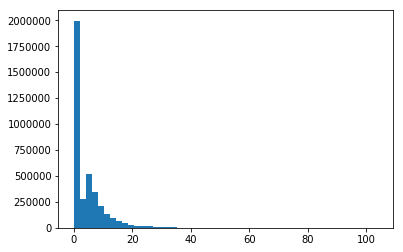

In [102]:
h = hist(allele_freq_female, bins=50)

In [44]:
# calculate L1 distance between samples
distance = np.zeros((X_male.shape[0], X_male.shape[0]), dtype='int64')
for k in tqdm_notebook(range(X_male.shape[0]**2)):
    i, j = k/X_male.shape[0], k%X_male.shape[0]
    distance[i, j] = np.sum(np.abs(X_male[i] - X_male[j]))

In [46]:
distance_female = np.zeros((X_female.shape[0], X_female.shape[0]), dtype='int64')
for k in tqdm_notebook(range(X_female.shape[0]**2)):
    i, j = k/X_female.shape[0], k%X_female.shape[0]
    if i <= j:
        distance_female[i, j] = np.sum(np.abs(X_female[i] - X_female[j]))

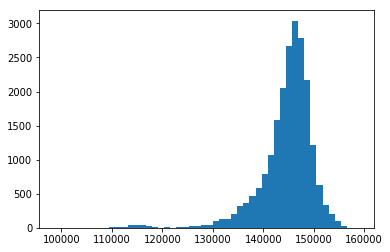

In [50]:
d = distance_female.flatten()
d = d[d > 0]
h = hist(d, bins=50)

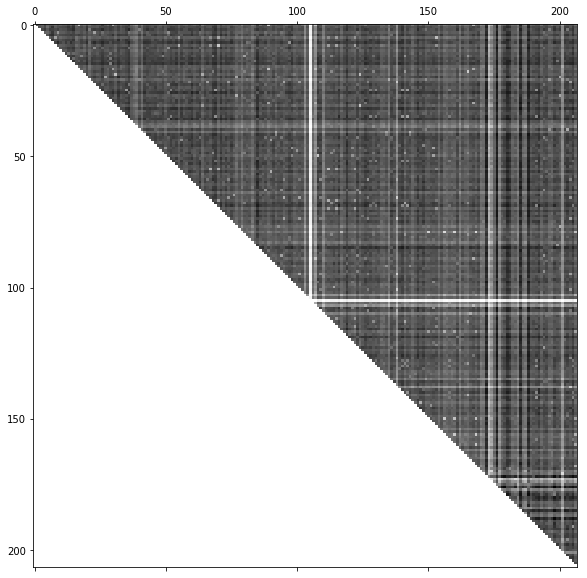

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(np.clip(distance_female, 110000, 180000), cmap=cm.Greys)

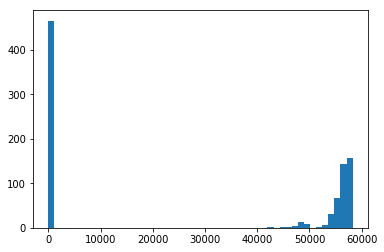

In [13]:
h = hist(np.tril(distance, k=-1).flatten(), bins=50)

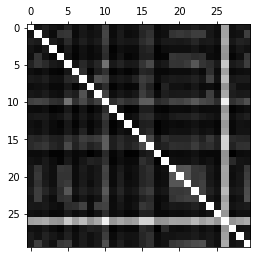

In [57]:
matshow(np.clip(distance, 40000, 100000), cmap=cm.Greys)

In [36]:
allele_freq = X_male.sum(axis=0) + X_female.sum(axis=0)

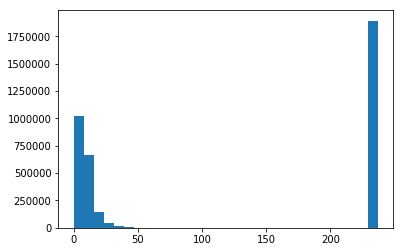

In [37]:
h = hist(allele_freq, bins=30)

In [39]:
bins, counts = np.unique(allele_freq, return_counts=True)

In [40]:
bins

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 119,
       121, 122, 123, 125, 127, 131, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 19

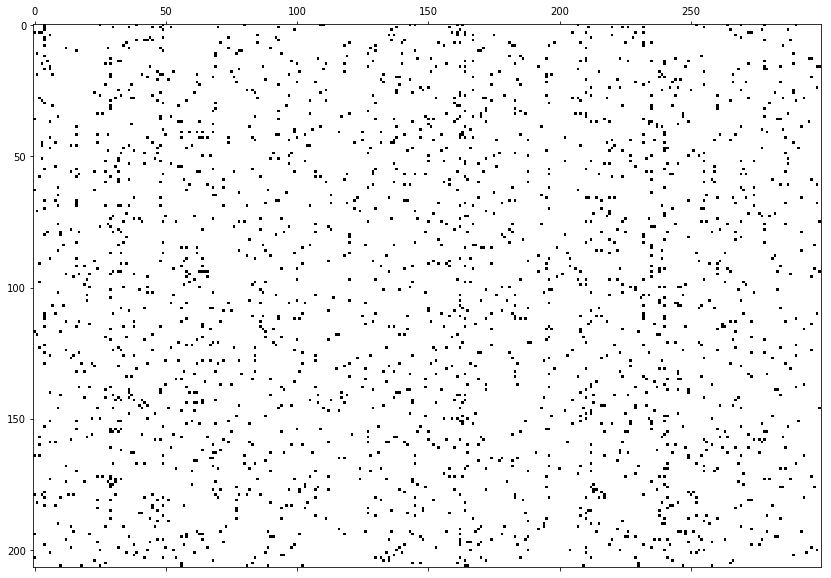

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.matshow(X_female[:, 1:600:2], cmap=cm.Greys)

In [103]:
reorder_female = argsort(allele_freq_female)

In [107]:
bins_female, counts_female = np.unique(allele_freq_female, return_counts=True)
print(bins_female)
print(counts_female)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[1901978   42974   50786   94612  178546  261916  258540  195387  150890
  117840   94105   75019   60407   49183   40464   33316   27494   22815
   18781   16113   13389   11426    9621    8102    7047    5967    5147
    4357    3782    3211    2783    2337    2077    1879    1579    1345
    1178    1039     897     808     704     688     566     472     443
     425     343     326     256     244     213     221     190     149
     154     144     119     103      98     100      96      81      69
      79      57      50      50      39      44      32      

In [105]:
np.cumsum(counts_female)

array([1901978, 1944952, 1995738, 2090350, 2268896, 2530812, 2789352,
       2984739, 3135629, 3253469, 3347574, 3422593, 3483000, 3532183,
       3572647, 3605963, 3633457, 3656272, 3675053, 3691166, 3704555,
       3715981, 3725602, 3733704, 3740751, 3746718, 3751865, 3756222,
       3760004, 3763215, 3765998, 3768335, 3770412, 3772291, 3773870,
       3775215, 3776393, 3777432, 3778329, 3779137, 3779841, 3780529,
       3781095, 3781567, 3782010, 3782435, 3782778, 3783104, 3783360,
       3783604, 3783817, 3784038, 3784228, 3784377, 3784531, 3784675,
       3784794, 3784897, 3784995, 3785095, 3785191, 3785272, 3785341,
       3785420, 3785477, 3785527, 3785577, 3785616, 3785660, 3785692,
       3785734, 3785757, 3785794, 3785818, 3785843, 3785868, 3785885,
       3785912, 3785927, 3785947, 3785960, 3785980, 3785996, 3786017,
       3786033, 3786050, 3786062, 3786078, 3786093, 3786099, 3786111,
       3786125, 3786134, 3786145, 3786160, 3786167, 3786176, 3786182,
       3786192, 3786

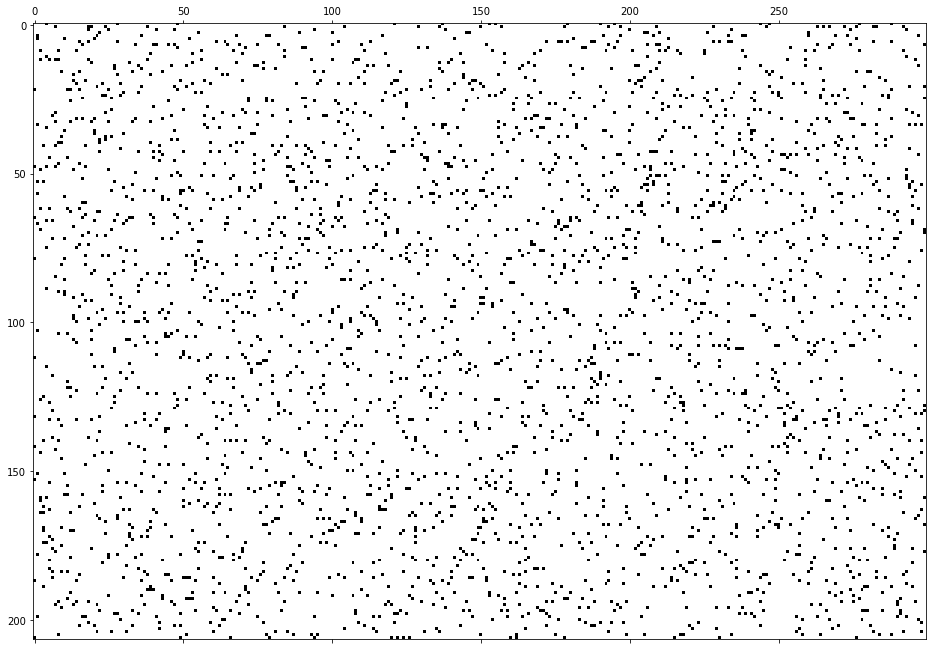

In [112]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.matshow(X_female[:, reorder_female[3253469:3347574]][:, 1:600:2], cmap=cm.Greys)